## Get Data

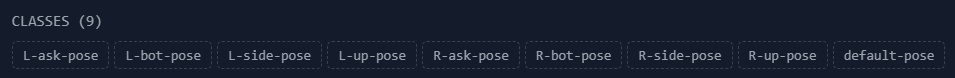

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QuwzZuvxyCQ2yTPnfDV9")
project = rf.workspace("edalex-work").project("yolo-mark")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolo-mark-2 in yolov8:: 100%|██████████| 430/430 [00:00<00:00, 7227.24it/s]


In [2]:
import os

HOME =os.getcwd()
HOME

'/kaggle/working'

In [3]:
!pip install ultralytics

from IPython import display
import ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 19.6 MB/s eta 0:00:0000:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Training

In [5]:
!ls {dataset.location}

README.dataset.txt  README.roboflow.txt  data.yaml  test  train  valid


In [6]:
!yolo task=pose mode=train model=yolo11l-pose.pt data={dataset.location}/data.yaml  epochs=100 imgsz=640 plots=True

100%|██████████████████████████████████████| 50.7M/50.7M [00:00<00:00, 56.4MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolo11l-pose.pt, data=/kaggle/working/yolo-mark-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save

In [7]:
!ls {HOME}/runs/pose/train/

BoxF1_curve.png					  labels_correlogram.jpg
BoxPR_curve.png					  results.csv
BoxP_curve.png					  results.png
BoxR_curve.png					  train_batch0.jpg
PoseF1_curve.png				  train_batch1.jpg
PosePR_curve.png				  train_batch2.jpg
PoseP_curve.png					  train_batch990.jpg
PoseR_curve.png					  train_batch991.jpg
args.yaml					  train_batch992.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1731242465.eb18158e0aa0.89.0  weights
labels.jpg


## Evaluation

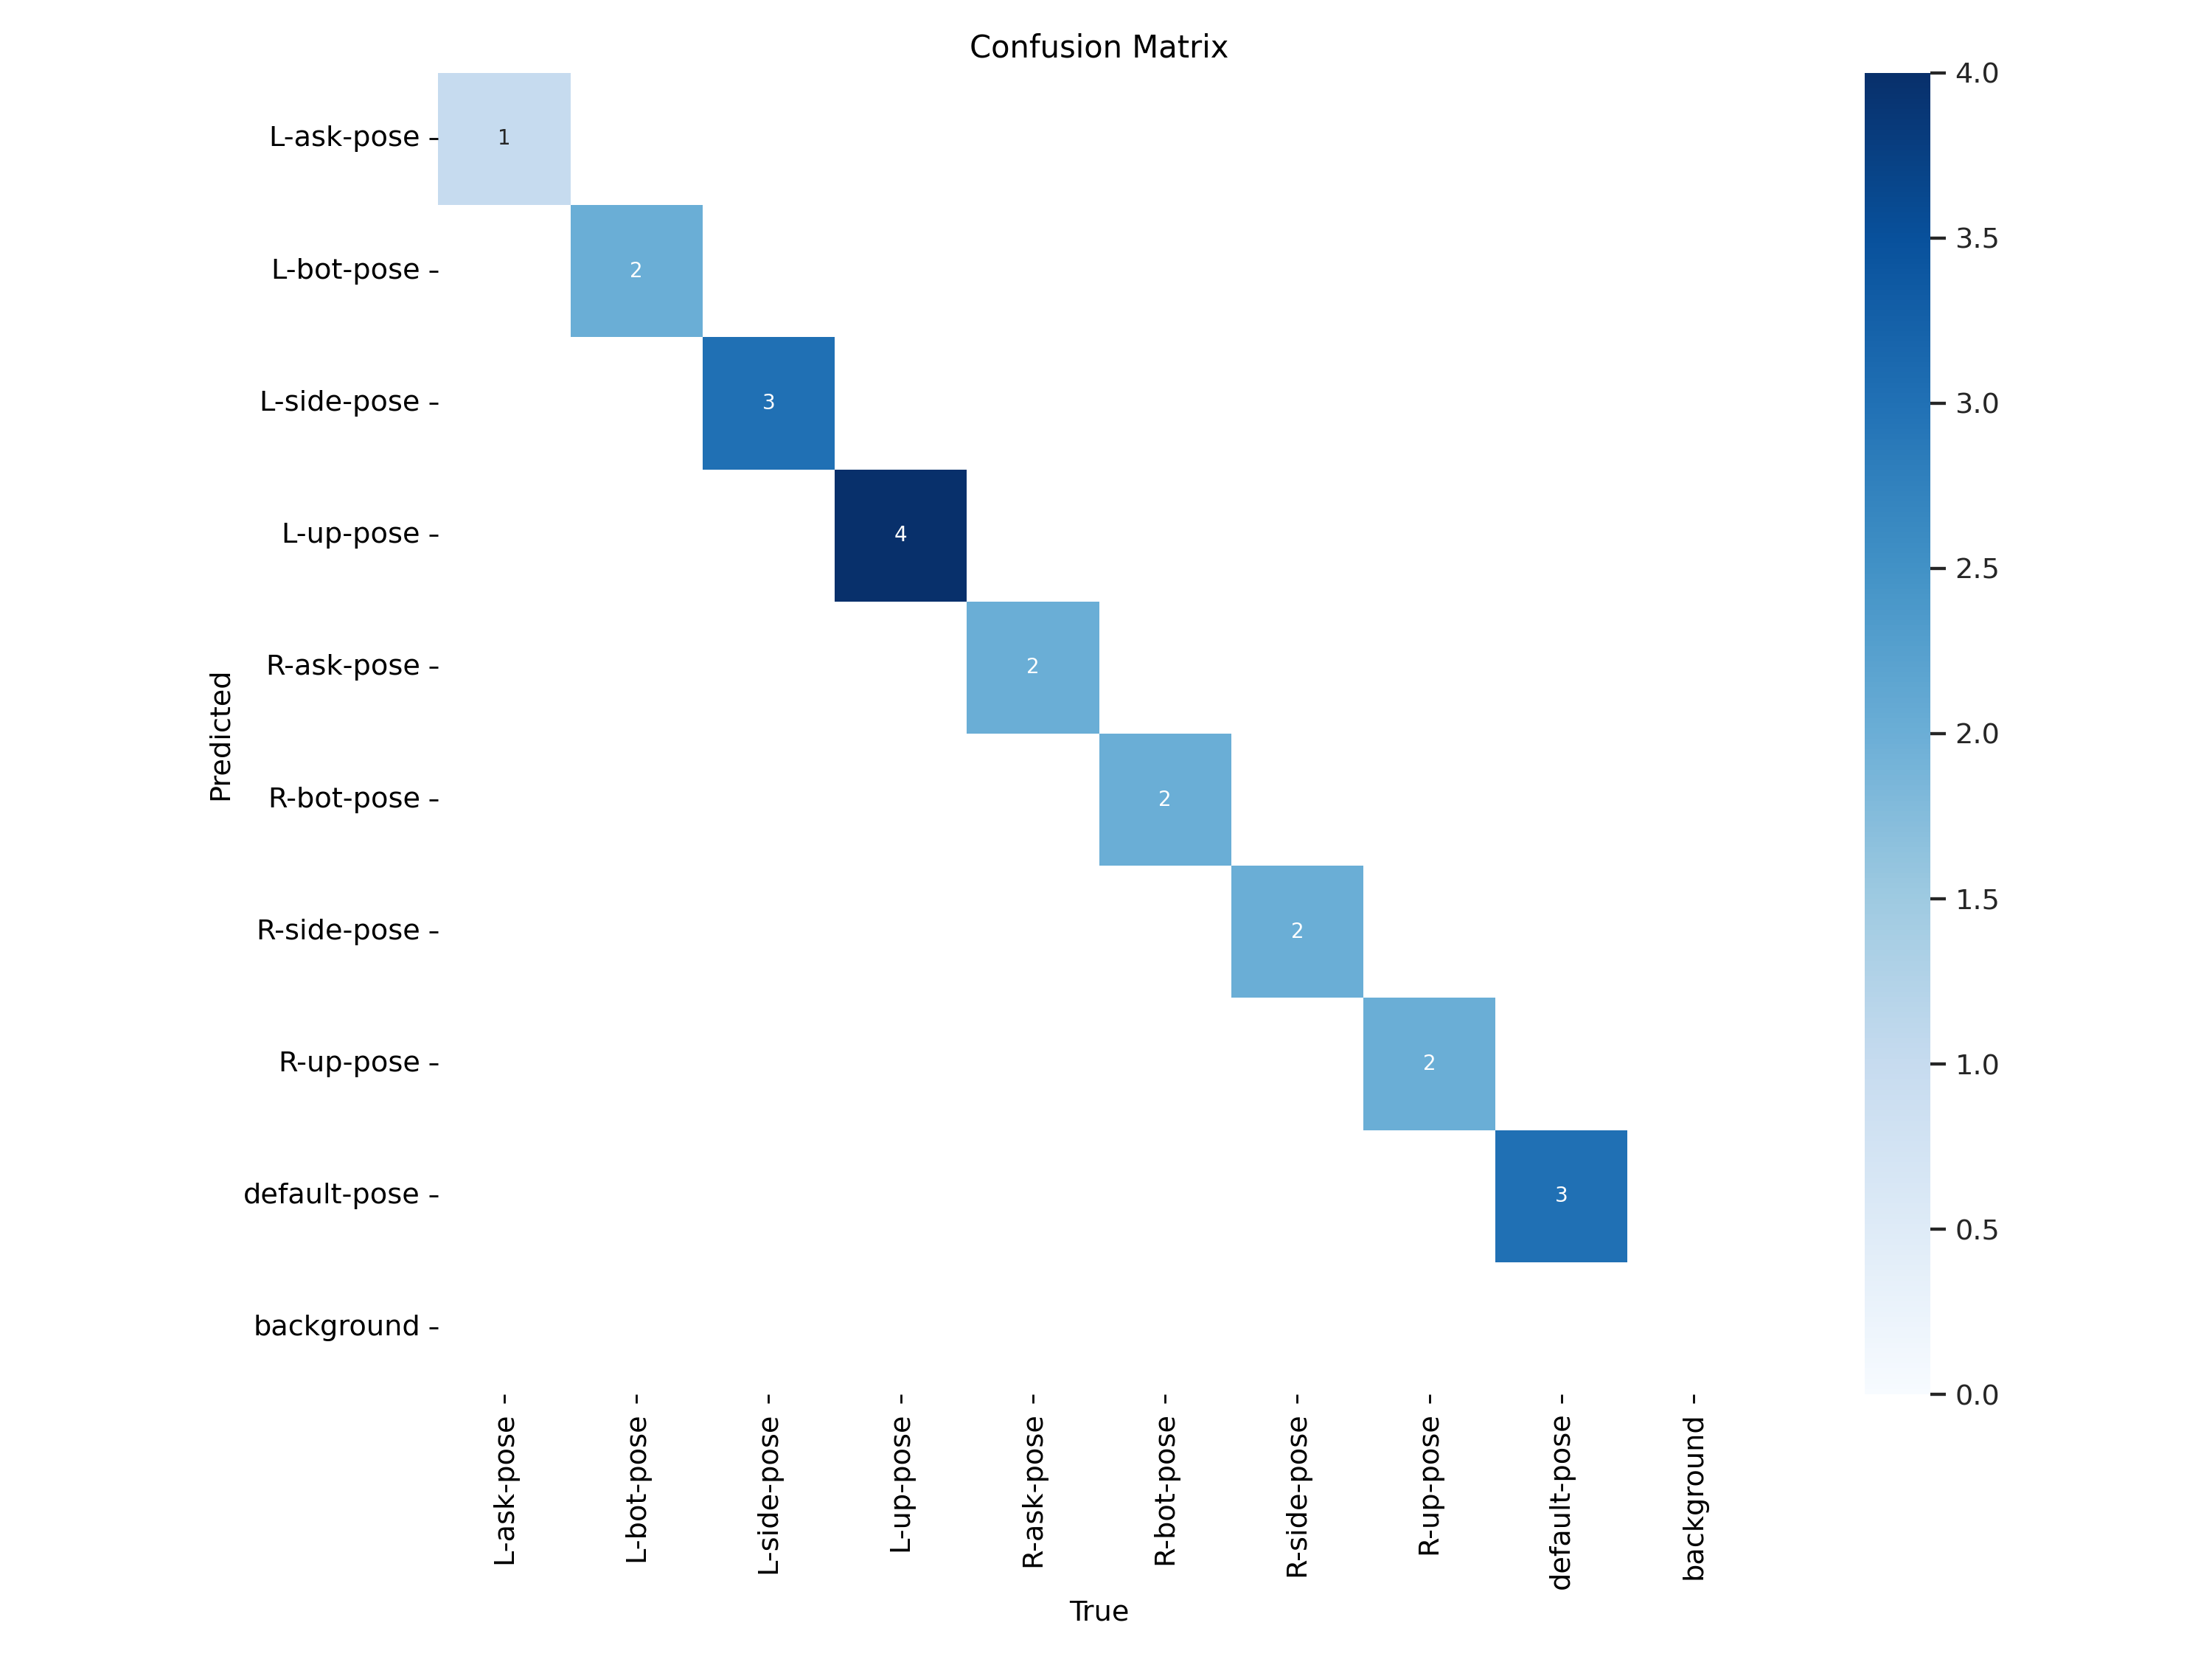

In [8]:
Image(filename=f'{HOME}/runs/pose/train/confusion_matrix.png', width=800)

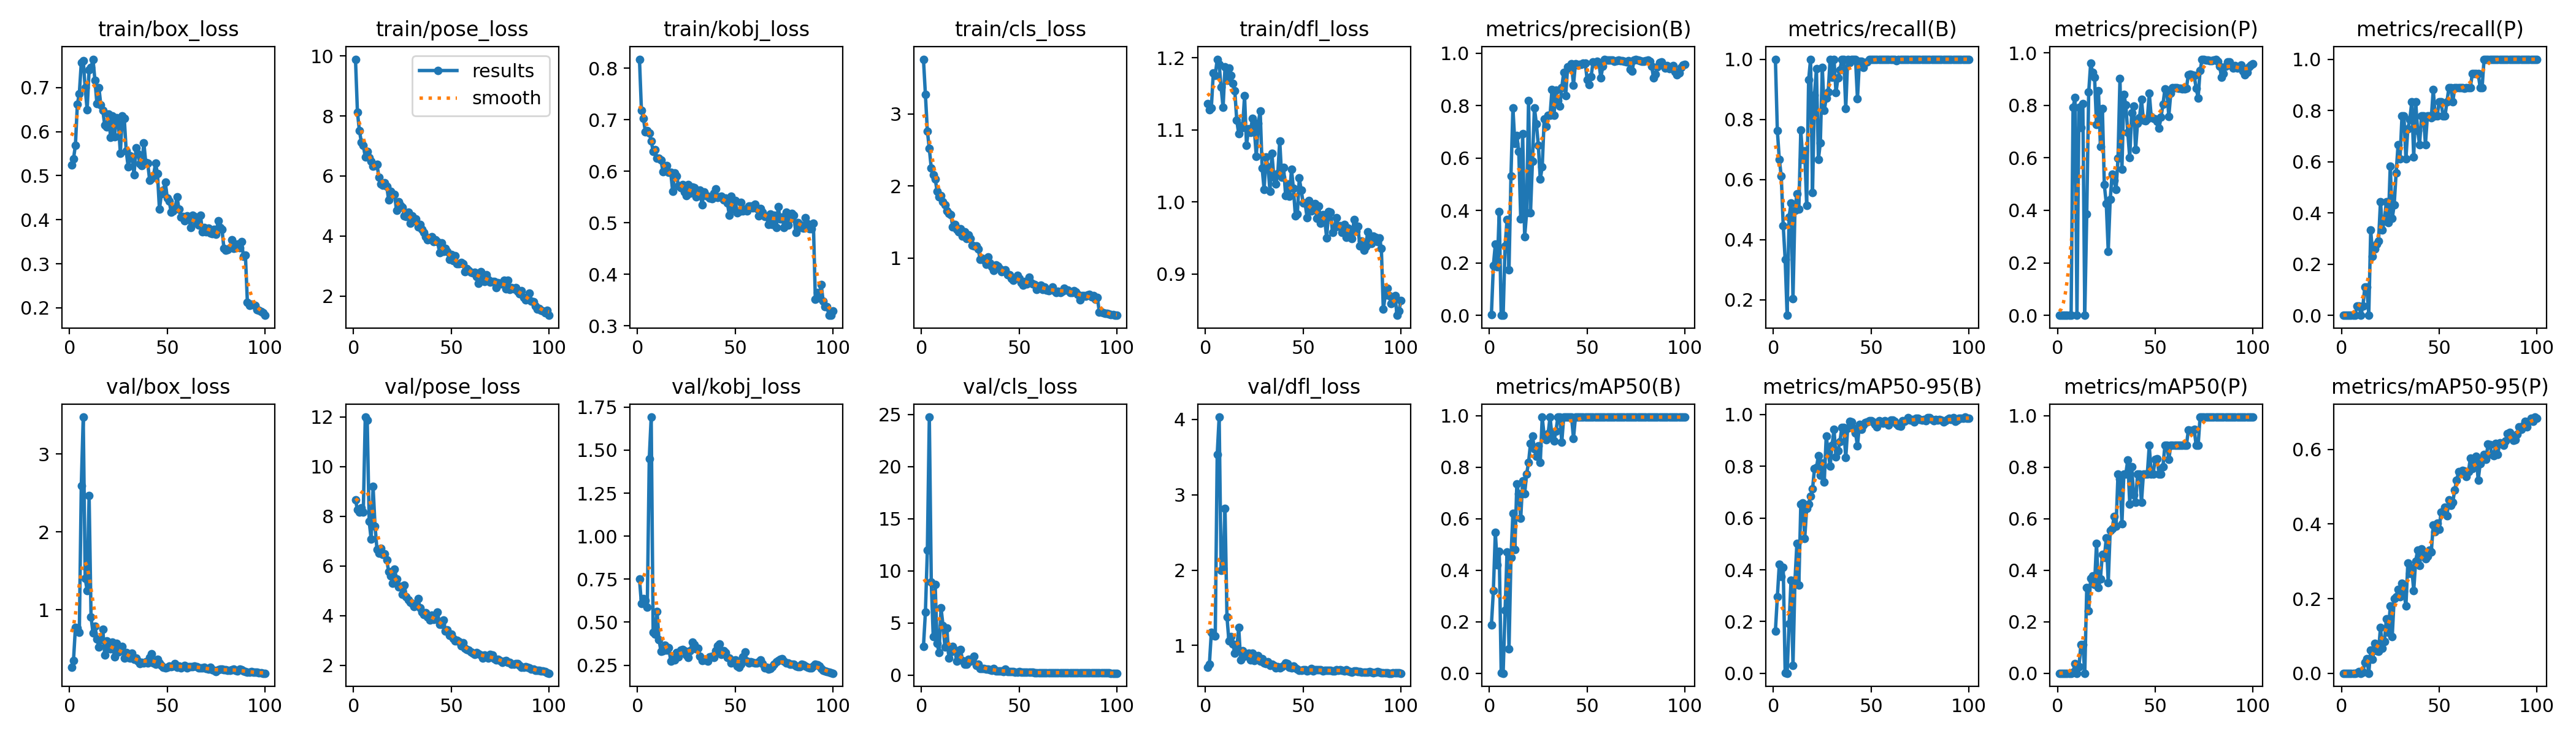

In [9]:
Image(filename=f'{HOME}/runs/pose/train/results.png', width=800)

## Validation

In [10]:
!yolo task=pose mode=val model=/{HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml  

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-pose summary (fused): 483 layers, 26,140,942 parameters, 0 gradients, 90.3 GFLOPs
val: Scanning /kaggle/working/yolo-mark-2/valid/labels.cache... 21 images, 0 bac
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         21         21      0.954          1      0.995      0.986      0.954          1      0.995      0.684
            L-ask-pose          1          1       0.97          1      0.995      0.995       0.97          1      0.995      0.697
            L-bot-pose          2          2      0.935          1      0.995      0.995      0.935          1      0.995      0.796
           L-side-pose          3          3      0.954          1      0.995      0.995      0.954          1      0.995      0.796
             L-up-pose          4          4      0.963          1      0.995      0.959      0.963          1      0.995      0.995
       

## Inferece

In [11]:
!yolo task=pose mode=predict model=/{HOME}/runs/pose/train/weights/best.pt conf=.3 source={dataset.location}/test/images  

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-pose summary (fused): 483 layers, 26,140,942 parameters, 0 gradients, 90.3 GFLOPs

image 1/21 /kaggle/working/yolo-mark-2/test/images/2K_handL_AskBot_38_jpg.rf.96e6ff7d35ca7ad5892e0931738ea987.jpg: 640x640 1 L-bot-pose, 49.4ms
image 2/21 /kaggle/working/yolo-mark-2/test/images/2K_handL_AskBot_40_jpg.rf.cbccb1b2327bcb871182557af4eab262.jpg: 640x640 1 L-bot-pose, 49.4ms
image 3/21 /kaggle/working/yolo-mark-2/test/images/2K_handL_AskUp_55_jpg.rf.e8278c3220fc47efff9dfc28a21a4299.jpg: 640x640 1 L-ask-pose, 49.3ms
image 4/21 /kaggle/working/yolo-mark-2/test/images/2K_handL_AskUp_60_jpg.rf.b8dbd6ef361e035d21afd2c8bfb8c2c3.jpg: 640x640 1 L-ask-pose, 49.3ms
image 5/21 /kaggle/working/yolo-mark-2/test/images/2K_handL_Up_10_jpg.rf.a947826c4258e5ef3be1277b01322cdf.jpg: 640x640 1 L-up-pose, 49.3ms
image 6/21 /kaggle/working/yolo-mark-2/test/images/2K_handL_Up_19_jpg.rf.fb70a888682cb140d21b2b8d5fb747c7.jpg: 640x640 1

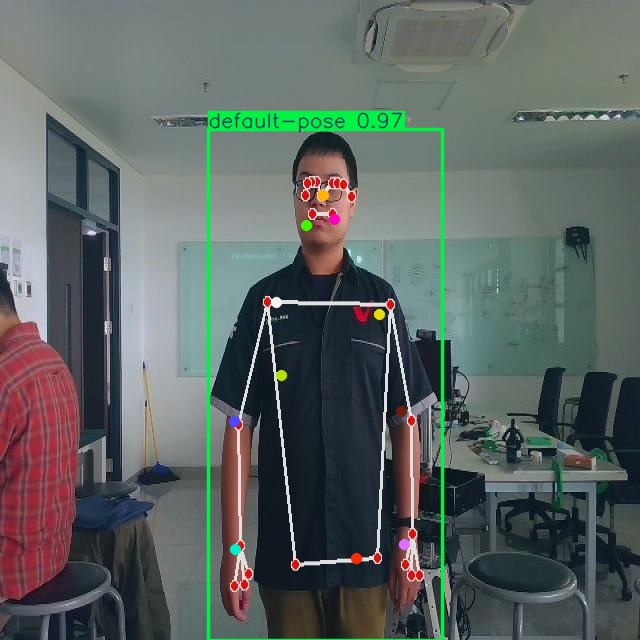

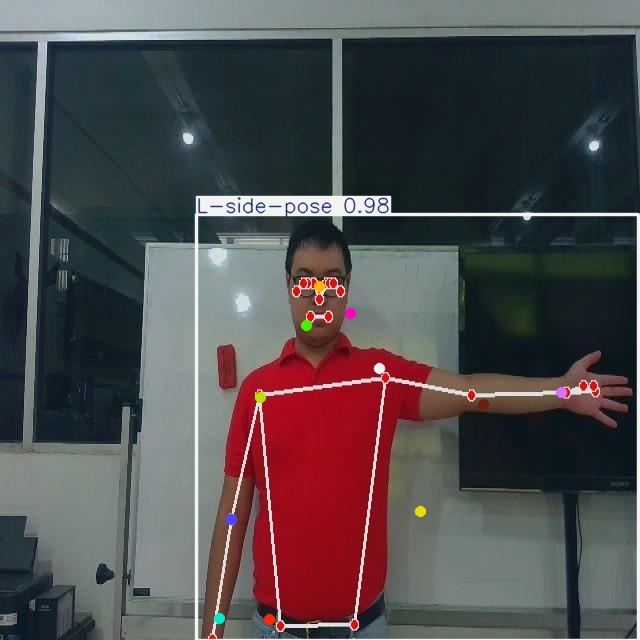

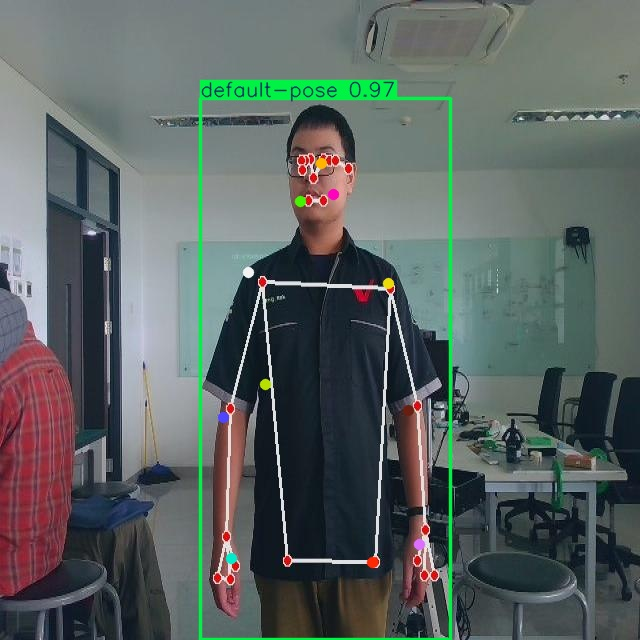

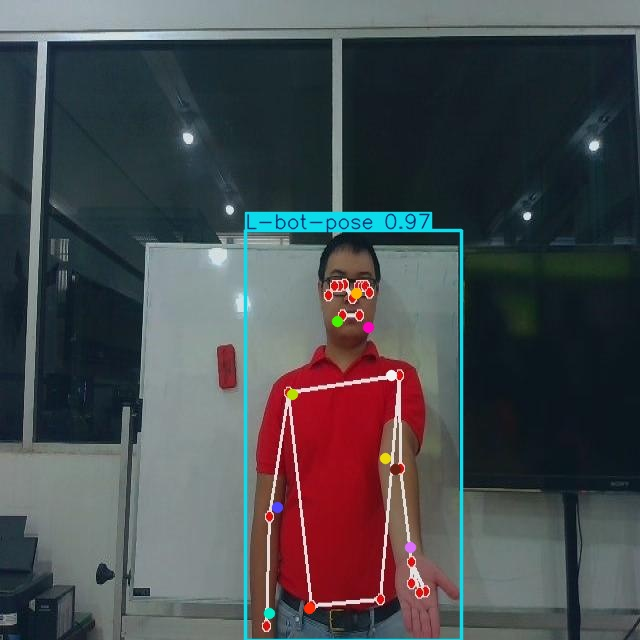

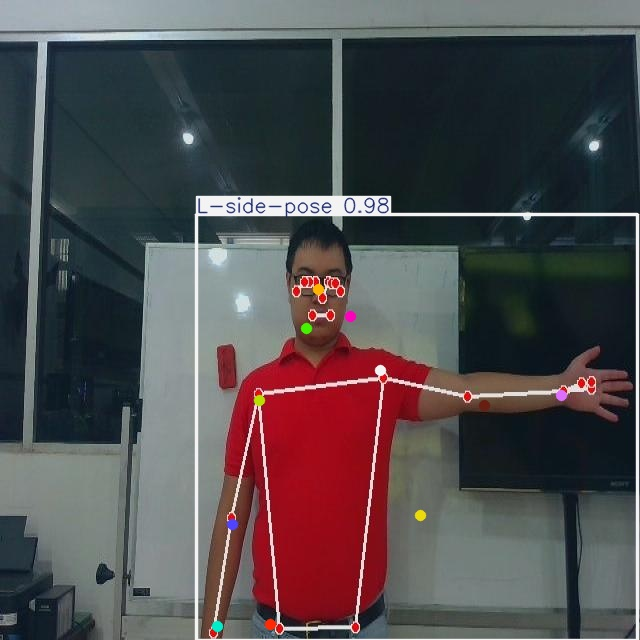

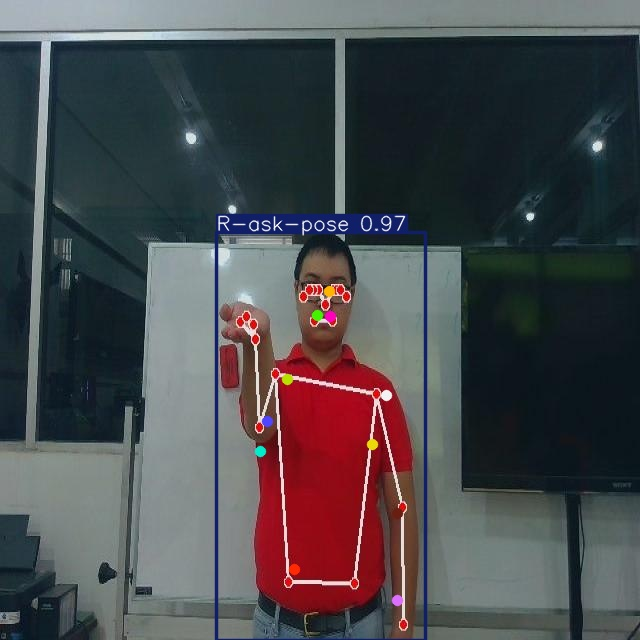

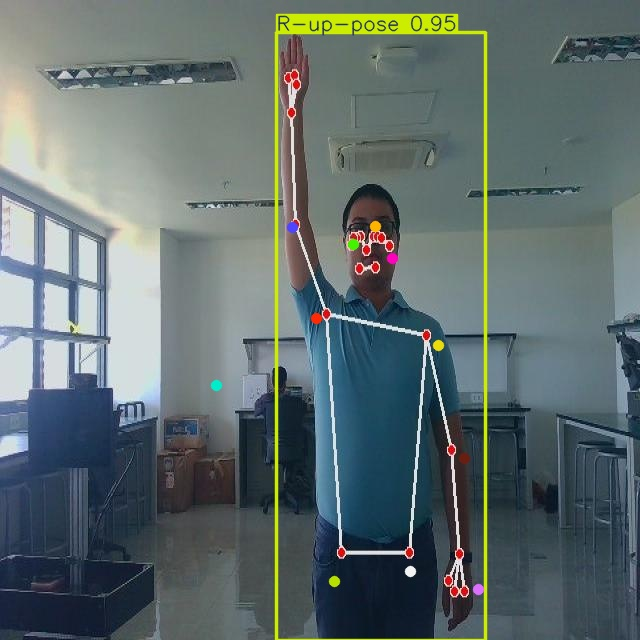

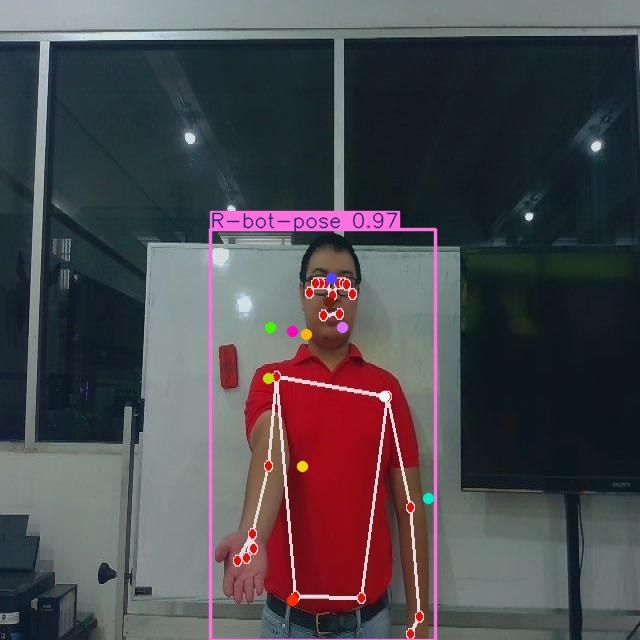

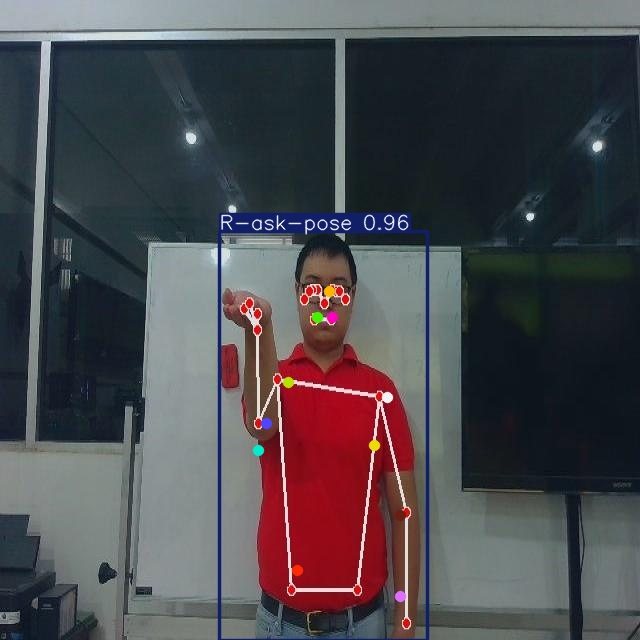

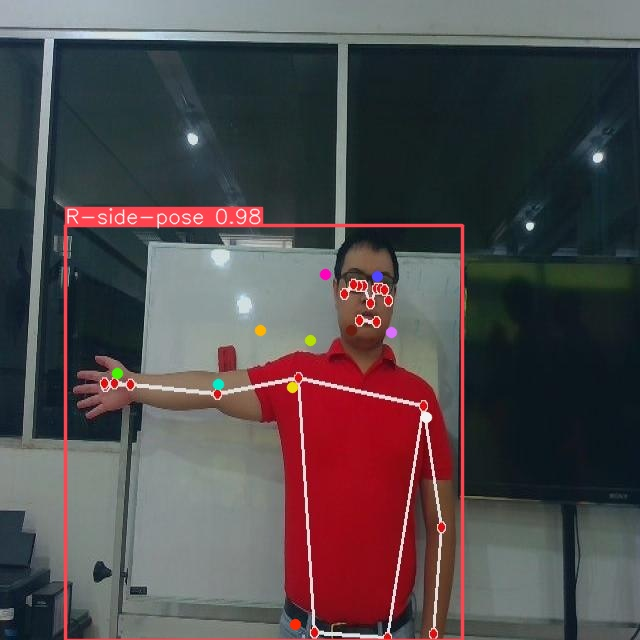

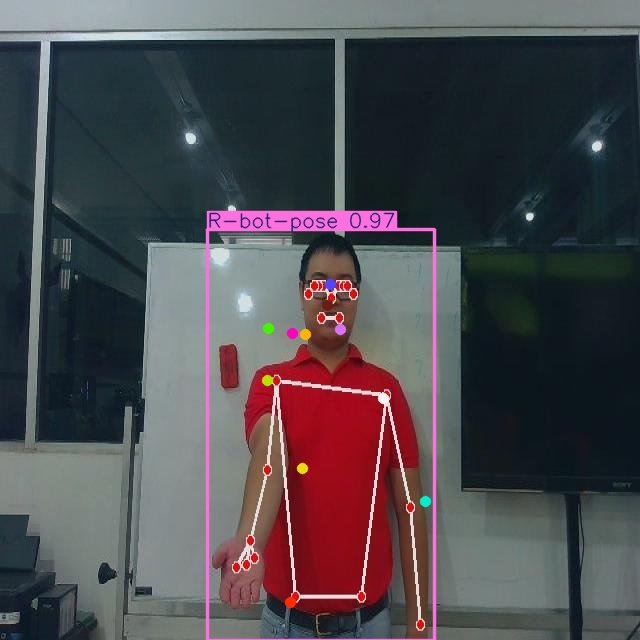

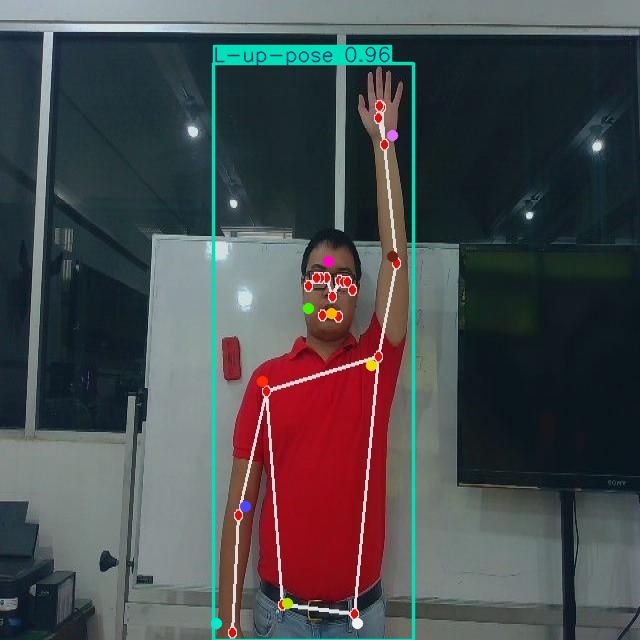

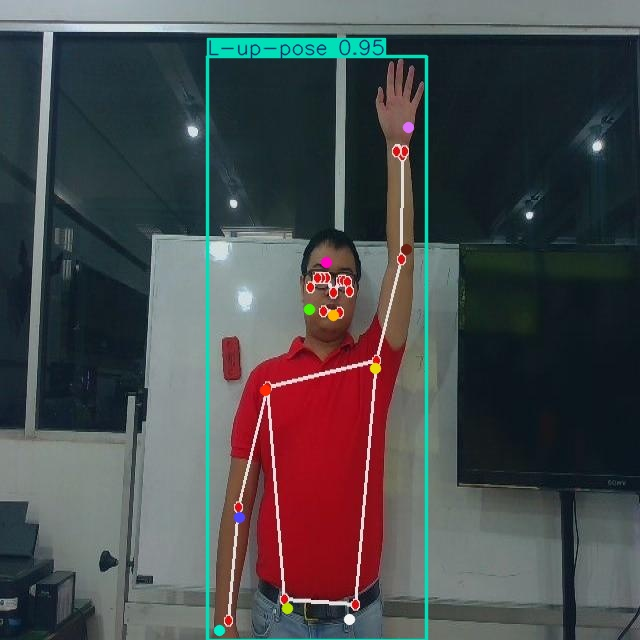

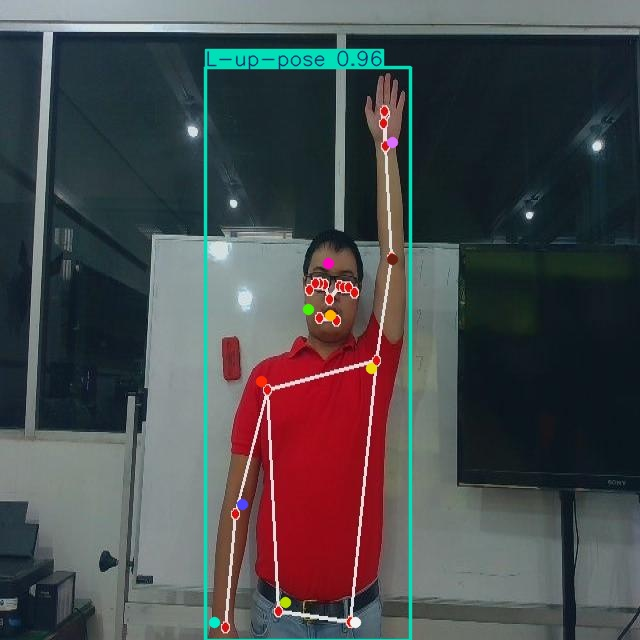

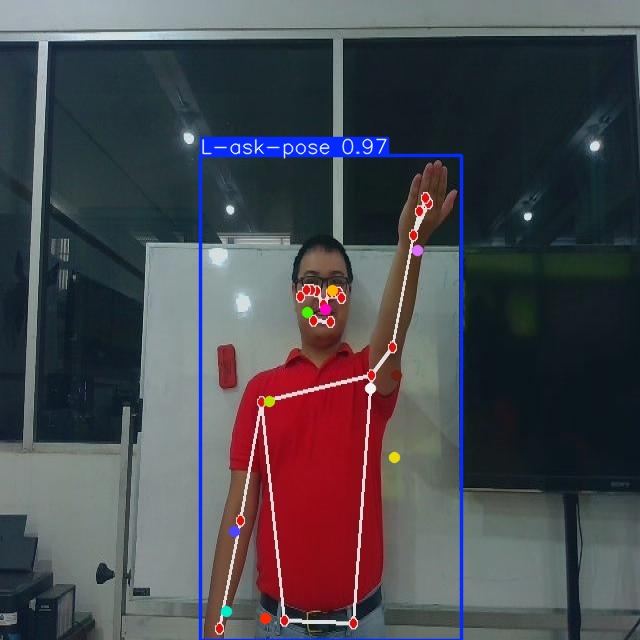

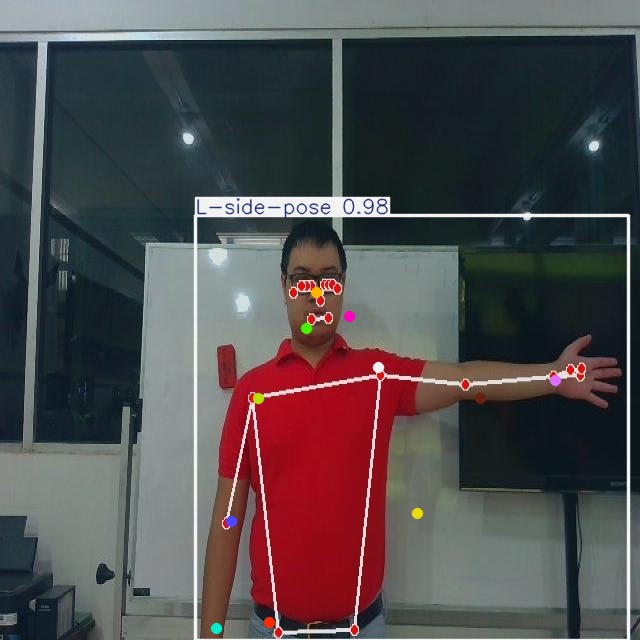

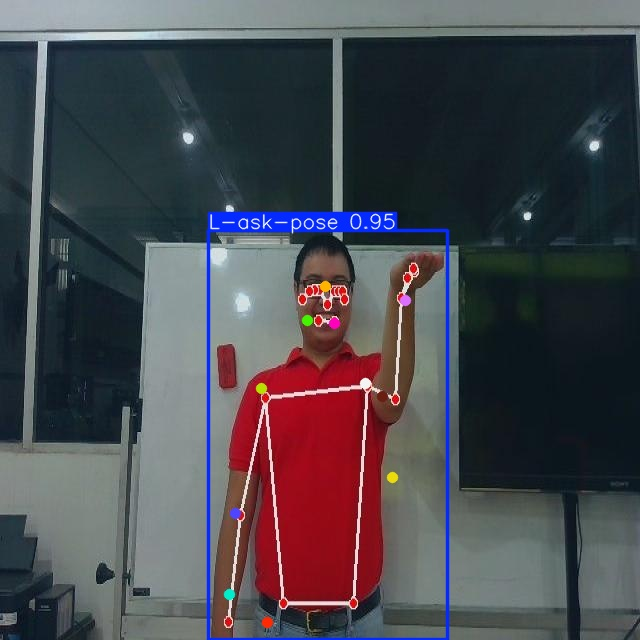

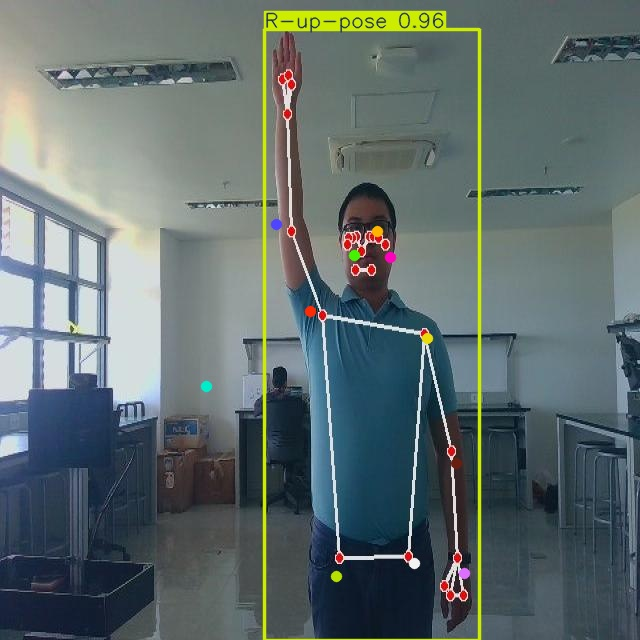

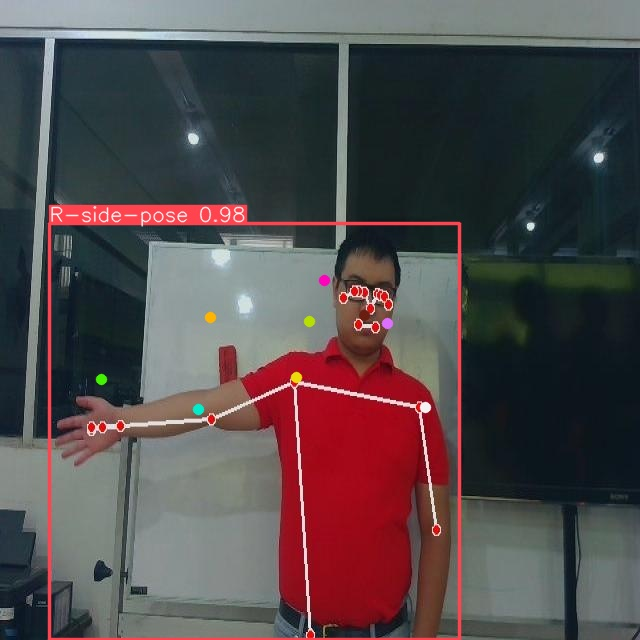

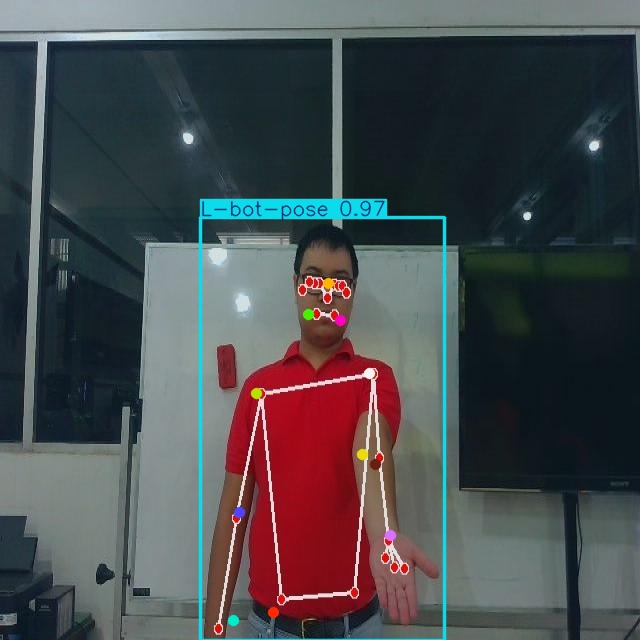

In [12]:
import glob
from IPython.display import display, Image


for img_path in glob.glob(f'{HOME}/runs/pose/predict/*.jpg')[:20]:
    display(Image(filename=img_path, width=600))
    print('\n')